In [1]:
import pandas as pd
import numpy as np

In [2]:
import statsmodels.api as sm
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_excel(r"C:\Users\Asus\Desktop\DDP\Clean3d_master_dataset.xlsx")

In [5]:
data.head()

,Time (s),Material,Alpha,Part,Node,X,Y,Z,Temperature,T_left,T_right,T_bottom,T_top,T_back,T_front,x/L,y/L,z/L
0,0.01,Copper,0.000111,PART-1-2,1,0.02,0.010,0.01,100.0,300,100,300,100,300,100,1.0,1.0,1.0
1,0.01,Copper,0.000111,PART-1-2,2,0.02,0.008,0.01,100.0,300,100,300,100,300,100,1.0,0.8,1.0
2,0.01,Copper,0.000111,PART-1-2,3,0.02,0.006,0.01,100.0,300,100,300,100,300,100,1.0,0.6,1.0
3,0.01,Copper,0.000111,PART-1-2,4,0.02,0.004,0.01,100.0,300,100,300,100,300,100,1.0,0.4,1.0
4,0.01,Copper,0.000111,PART-1-2,5,0.02,0.002,0.01,100.0,300,100,300,100,300,100,1.0,0.2,1.0


In [6]:
data.describe()

,Time (s),Alpha,Node,X,Y,Z,Temperature,T_left,T_right,T_bottom,T_top,T_back,T_front,x/L,y/L,z/L
count,569052.000000,569052.000000,569052.000000,569052.000000,569052.000000,569052.000000,5.690520e+05,569052.000000,569052.000000,569052.000000,569052.000000,569052.000000,569052.000000,569052.000000,569052.000000,569052.000000
mean,0.756263,0.000050,198.500000,0.010000,0.005000,0.005000,2.077144e+02,450.034795,100.069589,400.069589,100.139179,333.263744,133.402923,0.500000,0.500000,0.500000
std,1.763121,0.000041,114.315089,0.006325,0.003416,0.003416,1.406171e+02,111.896817,81.607074,81.692304,81.649611,47.115832,47.165039,0.316228,0.341565,0.341565
min,0.010000,0.000004,1.000000,0.000000,0.000000,0.000000,-1.757920e-35,300.000000,0.000000,300.000000,0.000000,300.000000,100.000000,0.000000,0.000000,0.000000
25%,0.050000,0.000004,99.750000,0.004000,0.002000,0.002000,1.000000e+02,300.000000,0.000000,300.000000,0.000000,300.000000,100.000000,0.200000,0.200000,0.200000
50%,0.120000,0.000064,198.500000,0.010000,0.005000,0.005000,2.000000e+02,500.000000,100.000000,400.000000,100.000000,300.000000,100.000000,0.500000,0.500000,0.500000
75%,0.500000,0.000111,297.250000,0.016000,0.008000,0.008000,3.000000e+02,600.000000,200.000000,500.000000,200.000000,400.000000,200.000000,0.800000,0.800000,0.800000
max,10.000000,0.000111,396.000000,0.020000,0.010000,0.010000,6.000000e+02,600.000000,200.000000,500.000000,200.000000,400.000000,200.000000,1.000000,1.000000,1.000000


In [7]:
import time
#storing starting time
begin = time.time()

#seperating independent and dependent variables, Temperature is the only dependent variable in our case
x = data[['T_left', 'T_right','T_bottom', 'T_top', 'T_back', 'T_front', 'Time (s)', 'x/L', 'y/L', 'z/L', 'Alpha']]
y = data['Temperature']
x.shape, y.shape 

((569052, 11), (569052,))

In [8]:
#Creating Training-Testing data from the new data frame

from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x, y , test_size = 0.25, random_state = 100)

In [9]:
#Importing Linear Regression and metric mean absolute error

from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [10]:
lr = LR()
# Fitting the model
lr.fit(train_x, train_y)

print(lr.intercept_) #Intercept of the Multiple Linear Regression

43574948833666.38


In [11]:
#storing end time
time.sleep(1)
end = time.time()

#Calculating runtime
print ("Total runtime of Linear Regression program (in seconds) is", end - begin)

Total runtime of Linear Regression program (in seconds) is 9.110755920410156


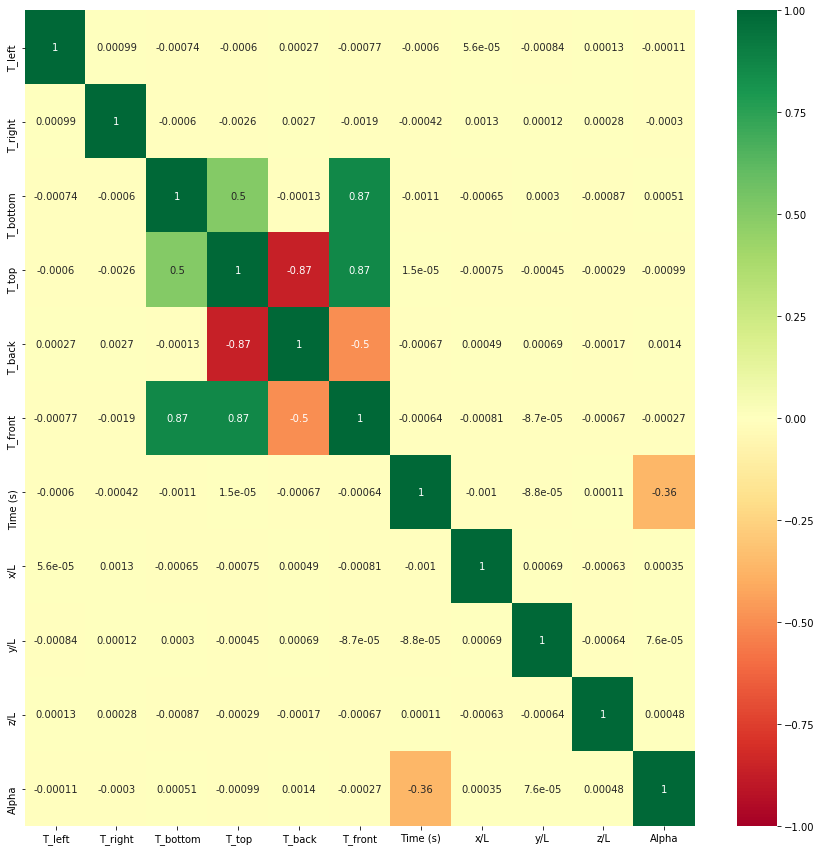

In [12]:
plt.figure(figsize = (15, 15))
sns.heatmap(train_x.corr(), annot = True, cmap="RdYlGn", vmin = -1, vmax = 1)
plt.show()   

In [13]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 83.72668375487768


In [14]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     84.20026556531944


In [15]:
#Regression Coefficients of the variables in order 
Coeff_data = {'Variables': ['T_left', 'T_right', 'T_bottom', 'T_top', 'T_back', 'T_front','Time (s)', 'x/L', 'y/L', 'z/L', 
                            'Alpha'], 'Coefficient': lr.coef_}
df = pd.DataFrame(Coeff_data, columns = ['Variables', 'Coefficient'])

print(df)

   Variables   Coefficient
0     T_left  5.604197e-02
1    T_right  6.699610e-02
2   T_bottom -2.109277e+10
3      T_top -1.593117e+11
4     T_back -1.382189e+11
5    T_front  2.014972e+11
6   Time (s)  9.010306e+00
7        x/L -1.057834e+02
8        y/L -1.527585e+02
9        z/L -1.613612e+02
10     Alpha  3.227240e+05


Text(0.5, 1.0, 'Coefficient plot')

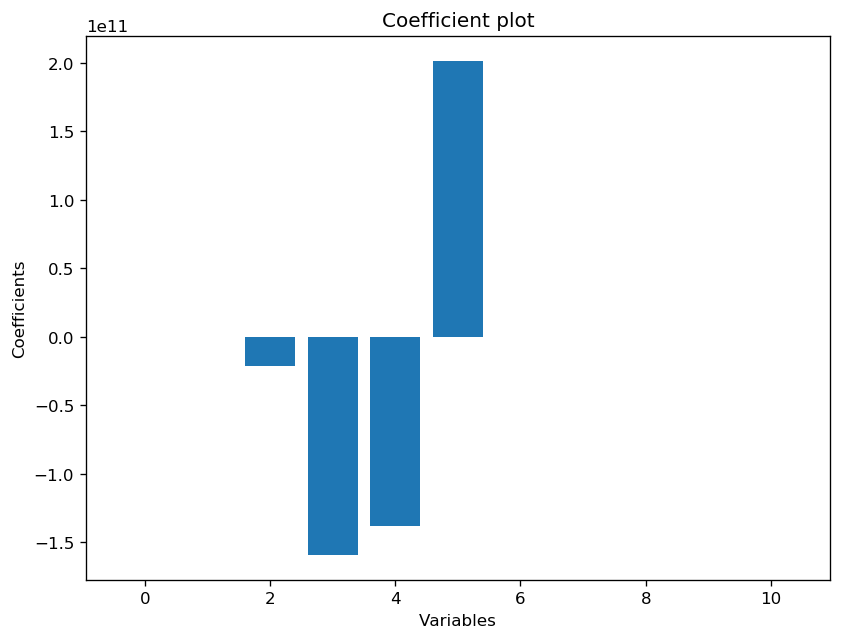

In [16]:
#Unscaled Coefficient vs Variable plot
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [17]:
lr.score(train_x, train_y)*100

40.48738963587848

In [18]:
lr.score(test_x,test_y)*100

40.17753413221803

In [19]:
y_pred = lr.predict(test_x)
print (y_pred)

[134.09375   232.171875  240.796875  ... 237.609375  140.8828125
 203.9375   ]


In [20]:
df=pd.DataFrame({'Actual':test_y, 'Predicted':y_pred})
df

,Actual,Predicted
306399,100.00000,134.093750
114750,200.00000,232.171875
439305,300.00000,240.796875
163614,300.00000,142.539062
109257,300.00000,405.453125
...,...,...
142312,200.00000,218.656250
434710,2.62269,188.734375
36817,400.00000,237.609375
512875,55.97630,140.882812


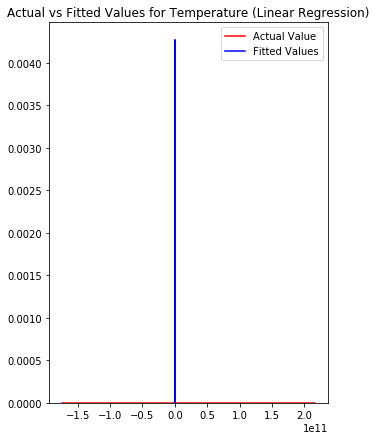

In [21]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Temperature (Linear Regression)')


plt.show()
plt.close()

## Scaling the Variables

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
data['scaled_T_left']   = StandardScaler().fit_transform(data[['T_left']])
data['scaled_T_right']  = StandardScaler().fit_transform(data[['T_right']])
data['scaled_T_bottom'] = StandardScaler().fit_transform(data[['T_bottom']])
data['scaled_T_top']    = StandardScaler().fit_transform(data[['T_top']])
data['scaled_time']     = StandardScaler().fit_transform(data[['Time (s)']])
data['scaled_location_x'] = StandardScaler().fit_transform(data[['x/L']])
data['scaled_location_y'] = StandardScaler().fit_transform(data[['y/L']])
data['scaled_alpha']    = StandardScaler().fit_transform(data[['Alpha']])
data

,Time (s),Material,Alpha,Part,Node,X,Y,Z,Temperature,T_left,...,y/L,z/L,scaled_T_left,scaled_T_right,scaled_T_bottom,scaled_T_top,scaled_time,scaled_location_x,scaled_location_y,scaled_alpha
0,0.01,Copper,0.000111,PART-1-2,1,0.02,0.010,0.01,100.0,300,...,1.0,1.0,-1.340833,-0.000853,-1.224958,-0.001705,-0.423263,1.581139,1.46385,1.467504
1,0.01,Copper,0.000111,PART-1-2,2,0.02,0.008,0.01,100.0,300,...,0.8,1.0,-1.340833,-0.000853,-1.224958,-0.001705,-0.423263,1.581139,0.87831,1.467504
2,0.01,Copper,0.000111,PART-1-2,3,0.02,0.006,0.01,100.0,300,...,0.6,1.0,-1.340833,-0.000853,-1.224958,-0.001705,-0.423263,1.581139,0.29277,1.467504
3,0.01,Copper,0.000111,PART-1-2,4,0.02,0.004,0.01,100.0,300,...,0.4,1.0,-1.340833,-0.000853,-1.224958,-0.001705,-0.423263,1.581139,-0.29277,1.467504
4,0.01,Copper,0.000111,PART-1-2,5,0.02,0.002,0.01,100.0,300,...,0.2,1.0,-1.340833,-0.000853,-1.224958,-0.001705,-0.423263,1.581139,-0.87831,1.467504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569047,10.00,Stainless Steel 310,0.000004,PART-1-2,392,0.00,0.008,0.00,300.0,600,...,0.8,0.0,1.340211,-1.226238,1.223255,1.223042,5.242831,-1.581139,0.87831,-1.136450
569048,10.00,Stainless Steel 310,0.000004,PART-1-2,393,0.00,0.006,0.00,300.0,600,...,0.6,0.0,1.340211,-1.226238,1.223255,1.223042,5.242831,-1.581139,0.29277,-1.136450
569049,10.00,Stainless Steel 310,0.000004,PART-1-2,394,0.00,0.004,0.00,300.0,600,...,0.4,0.0,1.340211,-1.226238,1.223255,1.223042,5.242831,-1.581139,-0.29277,-1.136450
569050,10.00,Stainless Steel 310,0.000004,PART-1-2,395,0.00,0.002,0.00,300.0,600,...,0.2,0.0,1.340211,-1.226238,1.223255,1.223042,5.242831,-1.581139,-0.87831,-1.136450


In [24]:
#seperating independent and dependent variables, Temperature is the only dependent variable in our case
x = data[['scaled_T_left', 'scaled_T_right', 'scaled_T_bottom', 'scaled_T_top', 'scaled_time', 'scaled_location_x', 'scaled_location_y', 'scaled_alpha']]
y = data['Temperature']
x.shape, y.shape

((569052, 8), (569052,))

In [25]:

# example of normalizing input and output variables for regression.
from numpy import mean
from numpy import absolute
from numpy import loadtxt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
# load data
#dataset = loadtxt('housing.csv', delimiter=",")
# split into inputs and outputs
#X, y = dataset[:, :-1], dataset[:, -1]
x = data[['scaled_T_left', 'scaled_T_right','scaled_T_bottom', 'scaled_T_top', 'scaled_time', 'scaled_location_x', 'scaled_location_y', 'scaled_alpha']]
y = data['Temperature']
# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', StandardScaler()), ('model', LR())])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=StandardScaler())
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 97.952


In [26]:
import time
#storing starting time
begin = time.time()

#Creating Training-Testing data from the new data frame

from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x, y , test_size = 0.25, random_state = 100)

In [27]:
#Importing Linear Regression and metric mean absolute error

from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [28]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

print(lr.intercept_) #Intercept of the Multiple Linear Regression

207.68531326731053


In [29]:
#storing end time
time.sleep(1)
end = time.time()

#Calculating runtime
print ("Total runtime of Random Forest program (in seconds) is", end - begin)

Total runtime of Random Forest program (in seconds) is 2.057631015777588


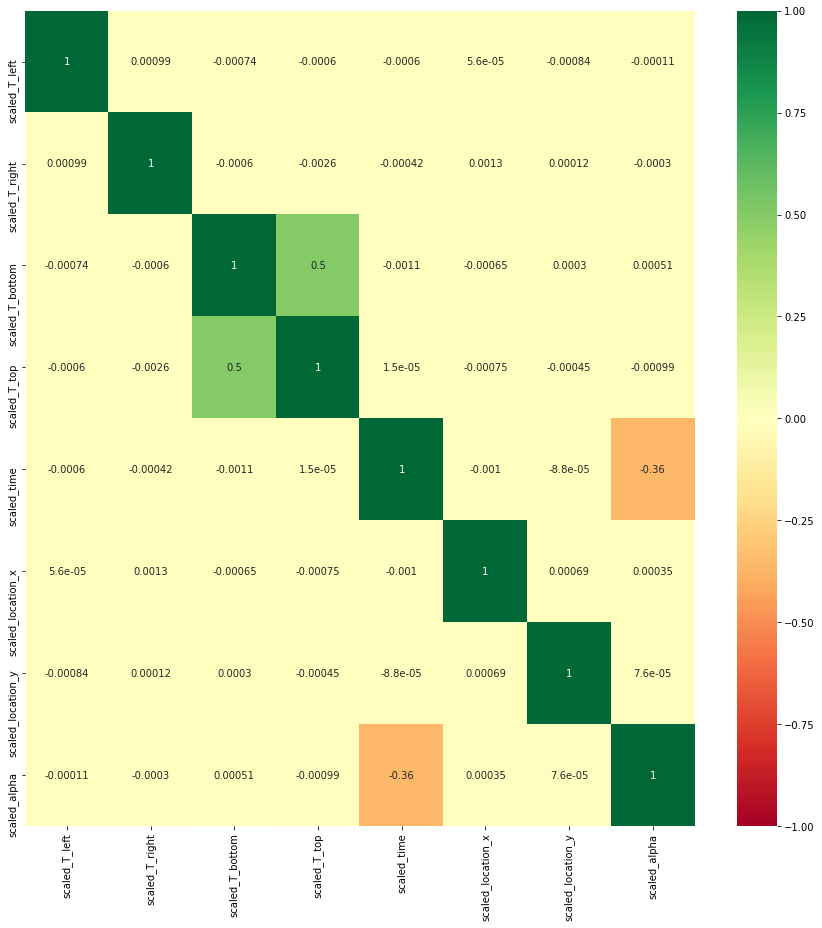

In [30]:
plt.figure(figsize = (15, 15))
sns.heatmap(train_x.corr(), annot = True, cmap="RdYlGn", vmin = -1, vmax = 1)
plt.show() 

In [31]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 97.86241725573107


In [32]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     98.19783212388971


In [33]:
lr.coef_

array([  6.26310299,   5.45085794,  23.81821032,   6.81112921,
        15.86830434, -33.41680853, -52.14182897,  13.28365372])

In [34]:
#Regression Coefficients of the variables in order 
Coeff_data = {'Variables': ['scaled_T_left', 'scaled_T_right', 'scaled_T_bottom', 'scaled_T_top', 'scaled_time', 'scaled_location_x', 'scaled_location_y', 'scaled_Alpha'], 'Coefficient': lr.coef_}
df = pd.DataFrame(Coeff_data, columns = ['Variables', 'Coefficient'])

print(df)

           Variables  Coefficient
0      scaled_T_left     6.263103
1     scaled_T_right     5.450858
2    scaled_T_bottom    23.818210
3       scaled_T_top     6.811129
4        scaled_time    15.868304
5  scaled_location_x   -33.416809
6  scaled_location_y   -52.141829
7       scaled_Alpha    13.283654


Text(0.5, 1.0, 'Coefficient plot')

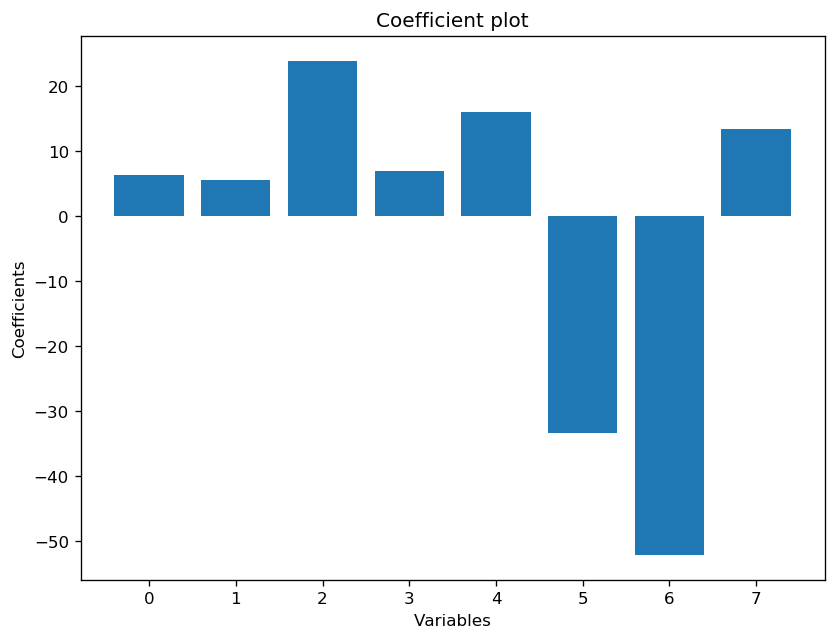

In [35]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [36]:
lr.score(train_x, train_y)*100

25.10530864056646

In [37]:
lr.score(test_x,test_y)*100

25.002319487290904

In [38]:
y_pred = lr.predict(test_x)
print (y_pred)

[214.59774159 215.98988257 160.01487098 ... 189.0100491  124.85889492
 187.69993159]


In [39]:
df=pd.DataFrame({'Actual':test_y, 'Predicted':y_pred})
df

,Actual,Predicted
306399,100.00000,214.597742
114750,200.00000,215.989883
439305,300.00000,160.014871
163614,300.00000,61.781702
109257,300.00000,324.662793
...,...,...
142312,200.00000,299.277961
434710,2.62269,236.975384
36817,400.00000,189.010049
512875,55.97630,124.858895


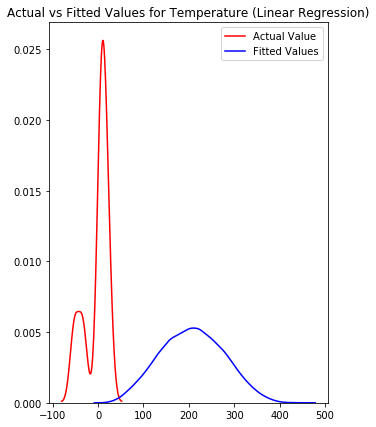

In [40]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Temperature (Linear Regression)')


plt.show()
plt.close()

## Using Analytical Solution to create features

In [41]:
#Taking Negative Natural Logarithm values of Diffusion Coefficient
#data['negLog_DC'] = np.log(data['Diffusion Coeff'])*(-1)

data['exp t1'] = np.exp((-10)* data['Time (s)'])

data['exp t2'] = np.exp((-40)* data['Time (s)'])

data['exp t3'] = np.exp((-90)* data['Time (s)'])

data['sq_x/L'] = np.square(data['x/L'])

data['sq_y/L'] = np.square(data['y/L'])

data['Tl-Tr'] = data['T_left'] - data['T_right']
data['Tb-Tt'] = data['T_bottom'] - data['T_top']

data['Tl+Tr'] = data['T_left'] + data['T_right']
data['Tb+Tt'] = data['T_bottom'] + data['T_top']

data['(sq_x/L)-x/L'] = data['sq_x/L'] - data['x/L']
data['(sq_y/L)-y/L'] = data['sq_y/L'] - data['y/L']

data['deltaT_x/L'] = data['Tl-Tr'] * data['x/L']

data['Timespacex1'] = data['(sq_x/L)-x/L'] * data['Tl+Tr'] * data['exp t1'] 
data['Timespacey1'] = data['(sq_y/L)-y/L'] * data['Tb+Tt'] * data['exp t1'] 

data['Timespacex2'] = data['(sq_x/L)-x/L'] * data['Tl-Tr'] * data['exp t2']
data['Timespacey2'] = data['(sq_y/L)-y/L'] * data['Tb-Tt'] * data['exp t2'] 

data['Timespacex3'] = data['(sq_x/L)-x/L'] * data['Tl+Tr'] * data['exp t3']
data['Timespacey3'] = data['(sq_y/L)-y/L'] * data['Tb+Tt'] * data['exp t3'] 
#data['DCParameter'] = (data['Diffusion Coeff'] * data['Time(s)'] * data['Tl-Tr']) / (data['sq_x/L'])


In [42]:
data.tail()

,Time (s),Material,Alpha,Part,Node,X,Y,Z,Temperature,T_left,...,Tb+Tt,(sq_x/L)-x/L,(sq_y/L)-y/L,deltaT_x/L,Timespacex1,Timespacey1,Timespacex2,Timespacey2,Timespacex3,Timespacey3
569047,10.0,Stainless Steel 310,0.000004,PART-1-2,392,0.0,0.008,0.0,300.0,600,...,700,0.0,-0.16,0.0,0.0,-4.166485e-42,0.0,-9.192814e-173,0.0,-0.0
569048,10.0,Stainless Steel 310,0.000004,PART-1-2,393,0.0,0.006,0.0,300.0,600,...,700,0.0,-0.24,0.0,0.0,-6.249728e-42,0.0,-1.378922e-172,0.0,-0.0
569049,10.0,Stainless Steel 310,0.000004,PART-1-2,394,0.0,0.004,0.0,300.0,600,...,700,0.0,-0.24,0.0,0.0,-6.249728e-42,0.0,-1.378922e-172,0.0,-0.0
569050,10.0,Stainless Steel 310,0.000004,PART-1-2,395,0.0,0.002,0.0,300.0,600,...,700,0.0,-0.16,0.0,0.0,-4.166485e-42,0.0,-9.192814e-173,0.0,-0.0
569051,10.0,Stainless Steel 310,0.000004,PART-1-2,396,0.0,0.000,0.0,300.0,600,...,700,0.0,0.00,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0


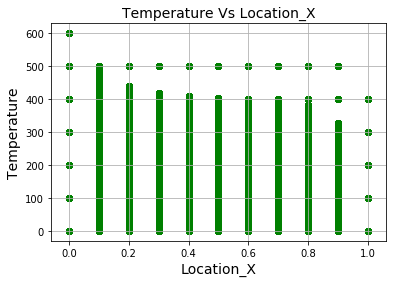

In [43]:
plt.scatter(data['x/L'], data['Temperature'], color='green')
plt.title('Temperature Vs Location_X', fontsize=14)
plt.xlabel('Location_X', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

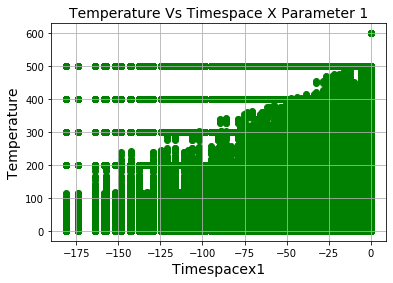

In [44]:
plt.scatter(data['Timespacex1'], data['Temperature'], color='green')
plt.title('Temperature Vs Timespace X Parameter 1', fontsize=14)
plt.xlabel('Timespacex1', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

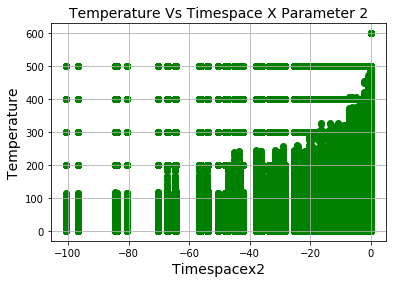

In [45]:
plt.scatter(data['Timespacex2'], data['Temperature'], color='green')
plt.title('Temperature Vs Timespace X Parameter 2', fontsize=14)
plt.xlabel('Timespacex2', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

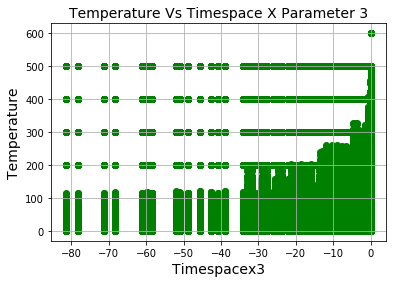

In [46]:
plt.scatter(data['Timespacex3'], data['Temperature'], color='green')
plt.title('Temperature Vs Timespace X Parameter 3', fontsize=14)
plt.xlabel('Timespacex3', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()